In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.misc import factorial
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_csv("hoja1.csv")
df

,Radiación fondo 1 s,Radiación fondo 10s,Radiacion fondo 0 60s,Radiación camisa 10s,Radiación columbita sin 10s,Radiación columbita papel 10s,Radiación columbita plomo 10s,Radiación radio 3 μg sin 10s,Radiación radio 3 μg papel 10s,Radiación radio 3 μg plomo 10s,...,Radio 226 5cm 1s,Radio 226 6cm 1s,Radio 226 7cm 1s,Radio 226 8cm 1s,Radio 226 9cm 1s,Radio 226 10cm 1s,Radio 226 11cm 1s,Radio 226 12cm 1s,Radio 226 13cm 1s,Radio 226 14cm 1s
0,0.0,4.0,25.0,106,12.0,20.0,2.0,199.0,209.0,164.0,...,1565.0,1224.0,936.0,695.0,593.0,515.0,409.0,360.0,281.0,244.0
1,0.0,5.0,26.0,84,15.0,18.0,4.0,196.0,171.0,181.0,...,1544.0,1174.0,926.0,752.0,567.0,420.0,415.0,369.0,280.0,229.0
2,0.0,5.0,25.0,60,13.0,8.0,12.0,182.0,186.0,159.0,...,1546.0,1187.0,904.0,753.0,625.0,527.0,417.0,330.0,261.0,254.0
3,1.0,3.0,26.0,87,8.0,15.0,8.0,209.0,188.0,158.0,...,1548.0,1163.0,936.0,695.0,618.0,539.0,393.0,366.0,281.0,249.0
4,0.0,3.0,32.0,84,11.0,19.0,8.0,180.0,174.0,172.0,...,1472.0,1132.0,892.0,738.0,623.0,510.0,382.0,339.0,326.0,230.0
5,NaN,NaN,NaN,101,13.0,11.0,7.0,195.0,193.0,158.0,...,1579.0,1191.0,889.0,644.0,629.0,528.0,440.0,370.0,283.0,257.0
6,0.0,2.0,26.0,97,18.0,21.0,4.0,226.0,188.0,164.0,...,1546.0,1184.0,875.0,735.0,555.0,514.0,401.0,390.0,326.0,245.0
7,0.0,0.0,23.0,94,13.0,9.0,3.0,201.0,206.0,166.0,...,1528.0,1192.0,893.0,764.0,608.0,476.0,390.0,353.0,292.0,238.0
8,2.0,3.0,25.0,88,12.0,6.0,9.0,175.0,196.0,203.0,...,1518.0,1182.0,937.0,678.0,599.0,541.0,408.0,339.0,310.0,249.0
9,0.0,3.0,21.0,97,15.0,11.0,4.0,179.0,178.0,165.0,...,1576.0,1093.0,899.0,725.0,598.0,501.0,361.0,374.0,292.0,243.0


# Parte 1

In [3]:
keys = ['Radiación fondo 1 s', 'Radiación fondo 10s', 'Radiacion fondo 0 60s']
angles = np.array([0, 70, -70])
times = np.array([1, 10, 60])

temp = df[pd.notnull(df[keys[0]])][keys]
angles_ = [np.ones(5)*angles[i] for i in range(3)]

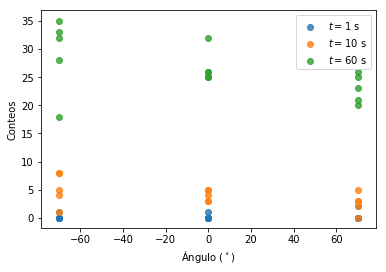

In [4]:
for i in range(3):
    a = temp[keys[i]].values
    plt.scatter(angles_, a, alpha = 0.8, label = "$t = %d$ s"%times[i])

plt.legend()
plt.xlabel("Ángulo ($^\circ$)")
plt.ylabel("Conteos")
plt.savefig("BackgroudAngle.pdf")
plt.show()

In [5]:
background = a.mean()/60
print("Background: %.2f +- %.2f becquerel "%(a.mean()/60, a.std()/60))

Background: 0.44 +- 0.08 becquerel 


/home/juan/.anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:4: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.


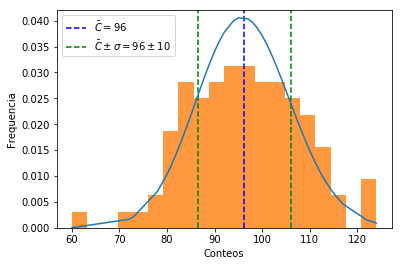

In [6]:
l = df["Radiación camisa 10s"].values.mean()
s = l**0.5
val = np.array(sorted(df["Radiación camisa 10s"].values))
dist = l**val*np.exp(-l)/factorial(val)

y_max = 0.042
plt.plot([l, l], [0, y_max], "--", color = "b", label = r"$\bar{C} = %d$"%l)
plt.plot([l - s, l - s], [0, y_max], "--", color = "g", label = r"$\bar{C}\pm\sigma = %d \pm %d$"%(l, np.ceil(s)))
plt.plot([l + s, l + s], [0, y_max], "--", color = "g")

plt.plot(val, dist)
plt.hist(val, bins = 20, normed = True, alpha = 0.8)

plt.xlabel("Conteos")
plt.ylabel("Frequencia")

plt.ylim(0, 0.042)

plt.legend()

# plt.savefig("Hist.pdf")
plt.show()

In [7]:
first = val[(val > l - s) & (val < l + s)].shape[0]
second = val[(val > l - 2*s) & (val < l + 2*s)].shape[0]

first, second = 100*first/val.shape[0], 100*second/val.shape[0]

print("C + sigma = %d"%first, ", C + 2sigma = %d"%second)

C + sigma = 58 , C + 2sigma = 93


# Parte 2

In [8]:
def calculatePercents(keys):
    temp = df[pd.notnull(df[keys[0]])][keys]
    
    means = np.mean(temp.values/10, axis = 0)
    stds = np.std(temp.values/10, axis = 0)
    
    top = max(means)

    back = background / top
    
    means = means - background 
    
    gamma = means[-1]/top 
    beta = means[-2]/top - gamma
    alpha = 1 - (gamma + beta)
    
    gammastd = stds[-1]/means[-1]
    betastd = stds[-2]/means[-2]
    alphastd = stds[-3]/means[-3]
    
    print("Background = %.3f"%(100*back))

    print("gamma = %.3f, beta = %.3f, alpha = %.3f"%(100*gamma, 100*beta, 100*alpha))
    print("gamma +- %.3f, beta +- %.3f, alpha +- %.3f"%(100*gamma*gammastd, 100*beta*betastd, 100*alpha*alphastd))

In [9]:
calculatePercents(["Radiación columbita sin 10s", "Radiación columbita papel 10s", "Radiación columbita plomo 10s"]
    )

Background = 31.804
gamma = 12.399, beta = 55.797, alpha = 31.804
gamma +- 21.848, beta +- 30.784, alpha +- 9.343


In [10]:
calculatePercents(["Radiación radio 3 μg sin 10s", "Radiación radio 3 μg papel 10s", "Radiación radio 3 μg plomo 10s"])

Background = 2.260
gamma = 84.764, beta = 10.247, alpha = 4.989
gamma +- 6.765, beta +- 0.665, alpha +- 0.395


In [11]:
calculatePercents(["Cesio sin 10s", "Cesio papel 10s", "Cesio plomo 10s"])

Background = 0.721
gamma = 7.981, beta = 82.958, alpha = 9.061
gamma +- 1.276, beta +- 3.016, alpha +- 0.394


In [12]:
calculatePercents(["Estroncio sin 10s", "Estroncio papel 10s", "Estroncio plomo 10s"])

Background = 1.024
gamma = -0.161, beta = 97.387, alpha = 2.774
gamma +- 0.443, beta +- 3.339, alpha +- 0.093


# Parte 3

In [13]:
keys = ["Radio 226 3cm 1s", "Radio 226 4cm 1s", "Radio 226 5cm 1s", "Radio 226 6cm 1s", "Radio 226 7cm 1s", 
"Radio 226 8cm 1s", "Radio 226 9cm 1s", "Radio 226 10cm 1s", "Radio 226 11cm 1s", "Radio 226 12cm 1s", 
"Radio 226 13cm 1s", "Radio 226 14cm 1s"]

temp = df[pd.notnull(df[keys[0]])][keys]
temp

,Radio 226 3cm 1s,Radio 226 4cm 1s,Radio 226 5cm 1s,Radio 226 6cm 1s,Radio 226 7cm 1s,Radio 226 8cm 1s,Radio 226 9cm 1s,Radio 226 10cm 1s,Radio 226 11cm 1s,Radio 226 12cm 1s,Radio 226 13cm 1s,Radio 226 14cm 1s
0,2962.0,2016.0,1565.0,1224.0,936.0,695.0,593.0,515.0,409.0,360.0,281.0,244.0
1,2978.0,1942.0,1544.0,1174.0,926.0,752.0,567.0,420.0,415.0,369.0,280.0,229.0
2,3057.0,2007.0,1546.0,1187.0,904.0,753.0,625.0,527.0,417.0,330.0,261.0,254.0
3,2967.0,2004.0,1548.0,1163.0,936.0,695.0,618.0,539.0,393.0,366.0,281.0,249.0
4,2927.0,1998.0,1472.0,1132.0,892.0,738.0,623.0,510.0,382.0,339.0,326.0,230.0
5,2951.0,1941.0,1579.0,1191.0,889.0,644.0,629.0,528.0,440.0,370.0,283.0,257.0
6,2963.0,2052.0,1546.0,1184.0,875.0,735.0,555.0,514.0,401.0,390.0,326.0,245.0
7,3008.0,1991.0,1528.0,1192.0,893.0,764.0,608.0,476.0,390.0,353.0,292.0,238.0
8,3055.0,2015.0,1518.0,1182.0,937.0,678.0,599.0,541.0,408.0,339.0,310.0,249.0
9,2942.0,2033.0,1576.0,1093.0,899.0,725.0,598.0,501.0,361.0,374.0,292.0,243.0


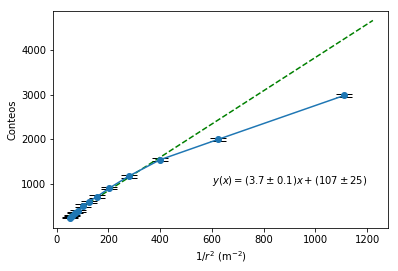

In [14]:
values = temp.values
means = np.mean(values, axis = 0)
stds = np.std(values, axis = 0)

lengths = np.arange(3, 15)/100

y = means
x = 1/lengths**2
plt.errorbar(x, y, yerr = stds, fmt='-o', ecolor = "k", capsize = 8)

(m, b), cov = np.polyfit(x[2:], y[2:], 1, cov=True)
x = np.linspace(0.9*x.min(), x.max()*1.1)
y = m*x + b

plt.plot(x, y, "--", color = "g")
plt.text(600, 1000, "$y(x) = (%.1f \pm %.1f)x + (%.0f \pm %.0f)$"%(m, cov[0, 0]**0.5, b, cov[1, 1]**0.5))
plt.xlabel("$1/r^2$ (m$^{-2}$)")
plt.ylabel("Conteos")
plt.savefig("Distance.pdf")
plt.show()

# Parte 4

In [15]:
df2 = pd.read_csv("hoja2.csv")
df2

,-90,-80,-70,-60,-50,-40,-30,-20,-10,0,10,20,30,40,50,60,70,80,90
0,341.0,438.0,579.0,747.0,1265.0,1982.0,3350.0,4489.0,5393.0,5836.0,6967.0,8171.0,7839.0,6457.0,4691.0,2430.0,1547.0,934.0,645.0
1,336.0,448.0,594.0,798.0,1275.0,2076.0,3246.0,4392.0,5417.0,5884.0,6998.0,8039.0,7860.0,6492.0,4556.0,2399.0,1545.0,935.0,617.0
2,338.0,497.0,564.0,780.0,1295.0,2023.0,3215.0,4368.0,5211.0,5878.0,6877.0,8124.0,7898.0,6546.0,4694.0,2394.0,1588.0,948.0,606.0
3,320.0,418.0,568.0,824.0,1358.0,2011.0,3321.0,4445.0,5465.0,5836.0,6905.0,8324.0,8028.0,6478.0,4690.0,2498.0,1586.0,874.0,647.0
4,309.0,450.0,596.0,797.0,1341.0,2015.0,3288.0,4369.0,5258.0,5831.0,6901.0,8027.0,7966.0,6522.0,4716.0,2439.0,1628.0,938.0,633.0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,798.0,1188.0,1707.0,2917.0,4971.0,7858.0,8825.0,7822.0,5502.0,4085.0,2955.0,1774.0,1096.0,702.0,530.0,478.0,457.0,364.0,295.0
7,829.0,1150.0,1674.0,2865.0,5105.0,7877.0,8836.0,7639.0,5452.0,4093.0,2968.0,1741.0,1148.0,697.0,526.0,430.0,470.0,344.0,322.0
8,788.0,1148.0,1736.0,2883.0,5119.0,7918.0,8816.0,7643.0,5524.0,4072.0,2917.0,1707.0,1109.0,698.0,579.0,488.0,403.0,360.0,285.0
9,851.0,1183.0,1682.0,2819.0,5000.0,7636.0,8861.0,7544.0,5532.0,4101.0,2957.0,1692.0,1155.0,650.0,531.0,455.0,431.0,338.0,287.0


In [16]:
angles = np.deg2rad(10*np.arange(-9, 10))
dir1 = df2.values[:5]
dir2 = df2.values[6:]

In [17]:
dir1 = dir1.mean(axis = 0)
dir2 = dir2.mean(axis = 0)

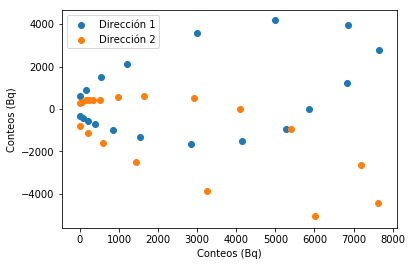

In [18]:
plt.scatter(dir1 * np.cos(angles), dir1 * np.sin(angles), label = "Dirección 1")
plt.scatter(dir2 * np.cos(angles), dir2 * np.sin(angles), label = "Dirección 2")

plt.legend()
plt.xlabel("Conteos (Bq)")
plt.ylabel("Conteos (Bq)")

plt.savefig("Magnetico.pdf")
plt.show()

# Parte 5

In [19]:
df3 = pd.read_csv("hoja3.csv")
df3

,ρ(mg/cm^2),4.5,6.5,14.1,28.1,59.1,102,129,161,206,258,328,419,516,645,849,1230,1890,3632,7435
0,NaN,Al-F-0.7mm-1s,Al-F-1mm-1s,Poly-5mm-1s,Poly-10mm-1s,Plastic-0.030in-1s,Plastic-0.040in-1s,Al-0.020in-1s,Al-0.025in-1s,Al-0.032in-1s,Al-0.040in-1s,Al-0.050in-1s,Al-0.063in-1s,Al-0.080in-1s,Al-0.100in-1s,Al-0.125in-1s,Lead-0.032in-1s,Lead-0.064in-10s,Lead-0.125in-10s,Lead-0.250in-10s
1,NaN,1248,1179,1067,811,431,334,214,217,104,63,50,42,27,19,15,15,98,94,77
2,NaN,1291,1210,1151,855,438,331,180,224,124,86,61,44,23,20,13,10,102,84,82
3,NaN,1243,1192,1080,796,441,351,207,199,116,67,53,37,21,20,11,10,97,86,78


In [20]:
df4 = pd.read_csv("hoja4.csv")
df4

,1,2,4,8,16,32
0,1233,1153,793,648,374,146
1,1245,1128,877,625,367,155
2,1209,1098,818,640,336,175
3,1247,1161,918,604,375,172
4,1219,1078,859,604,370,167


In [21]:
def plot(thick, means, label):
    means = np.log10(means)
    temp = plt.plot(thick, means, "-o", label = label)[0]
    
    if len(thick) > 2:
        if len(thick) > 4:
            (m, b), cov = np.polyfit(thick, means, 1, cov = True)
            sm = cov[0,0]**0.5
        else:
            m, b, r_value, p_value, sm = stats.linregress(thick, means)
            
        x = np.linspace(0.9*thick[0], thick[-1]*1.1)
        y = m*x + b

        c = temp.get_color()
        plt.plot(x, y, "--", color = c)
        
        if label == "Aluminio":
            text = "$y(x) = (%.2f \pm %.2f)x + %.1f$"%(m, sm, b)
        else: text = "$y(x) = (%.3f \pm %.3f)x + %.1f$"%(m, sm, b)
        
        plt.text(x.mean(), y.mean()*1.1, text, color = c)

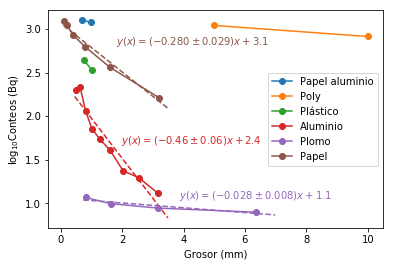

In [22]:
values = df3.values[1:, 1:].astype(float)
means = values.mean(axis = 0)
stds = values.std(axis = 0)

al_x = [0.508, 0.635, 0.8128, 1.016, 1.27, 1.6001999999999998, 2.032, 2.54, 3.175]
al = means[6:-4]
pb_x = [0.032, 0.064, 0.125, 0.250]
pb_x = [25.4*i for i in pb_x]
pb = means[-4:]
pb[1:] *= 1/10 

plot([0.7, 1], means[:2], "Papel aluminio")
plot([5, 10], means[2:4], "Poly")
plot([0.030*25.4, 0.040*25.4], means[4:6], label = "Plástico")
plot(al_x, al, "Aluminio")
plot(pb_x, pb, "Plomo")

means = df4.values.mean(axis = 0)
plot([0.1*2**i for i in range(6)], means, "Papel")


plt.legend()
plt.xlabel("Grosor (mm)")
plt.ylabel("$\log_{10}$Conteos (Bq)")
plt.savefig("Materials.pdf")
plt.show()